In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'COVID19_line_list_data.csv',
 'COVID19_open_line_list.csv',
 'covid_19_data.csv',
 'lala.ipynb',
 'mymap.html',
 'novel-corona-virus-2019-dataset.zip',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_recovered.csv']

In [16]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [20]:
confirmed_df[confirmed_df['Country/Region']=='India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
15,NaN,India,21.0,78.0,0,0,0,0,0,0,...,43,56,62,73,82,102,113,119,142,156


In [5]:
sum(covid_19_data[covid_19_data['Country/Region']=='India']['Confirmed']),\
sum(covid_19_data[covid_19_data['Country/Region']=='India']['Deaths']),\
sum(covid_19_data[covid_19_data['Country/Region']=='India']['Recovered']),

(1209.0, 16.0, 143.0)

In [6]:
time_series_covid_19_confirmed.shape

(442, 57)

In [7]:
pivotedData=pd.pivot_table(covid_19_data,index=['Last Update'],columns=['Country/Region'],values=['Confirmed','Deaths','Recovered'],aggfunc=np.max)

In [8]:
import dateutil
indexTimeStamp=[]
for i in pivotedData.index.values:
    indexTimeStamp.append(dateutil.parser.parse(i))

In [9]:
pivotedData.index=indexTimeStamp

In [10]:
confirmedCases=pivotedData['Confirmed'].resample('1d',how='sum')
DeathsCases=pivotedData['Deaths'].resample('1d',how='sum')
RecoveredCases=pivotedData['Deaths'].resample('1d',how='sum')

C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.
C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  
C:\Users\swsh\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
pivotedData['Confirmed']['India'].fillna(0).sum()

1129.0

In [14]:
graphVal=confirmedCases.sum().sort_values(ascending=True)

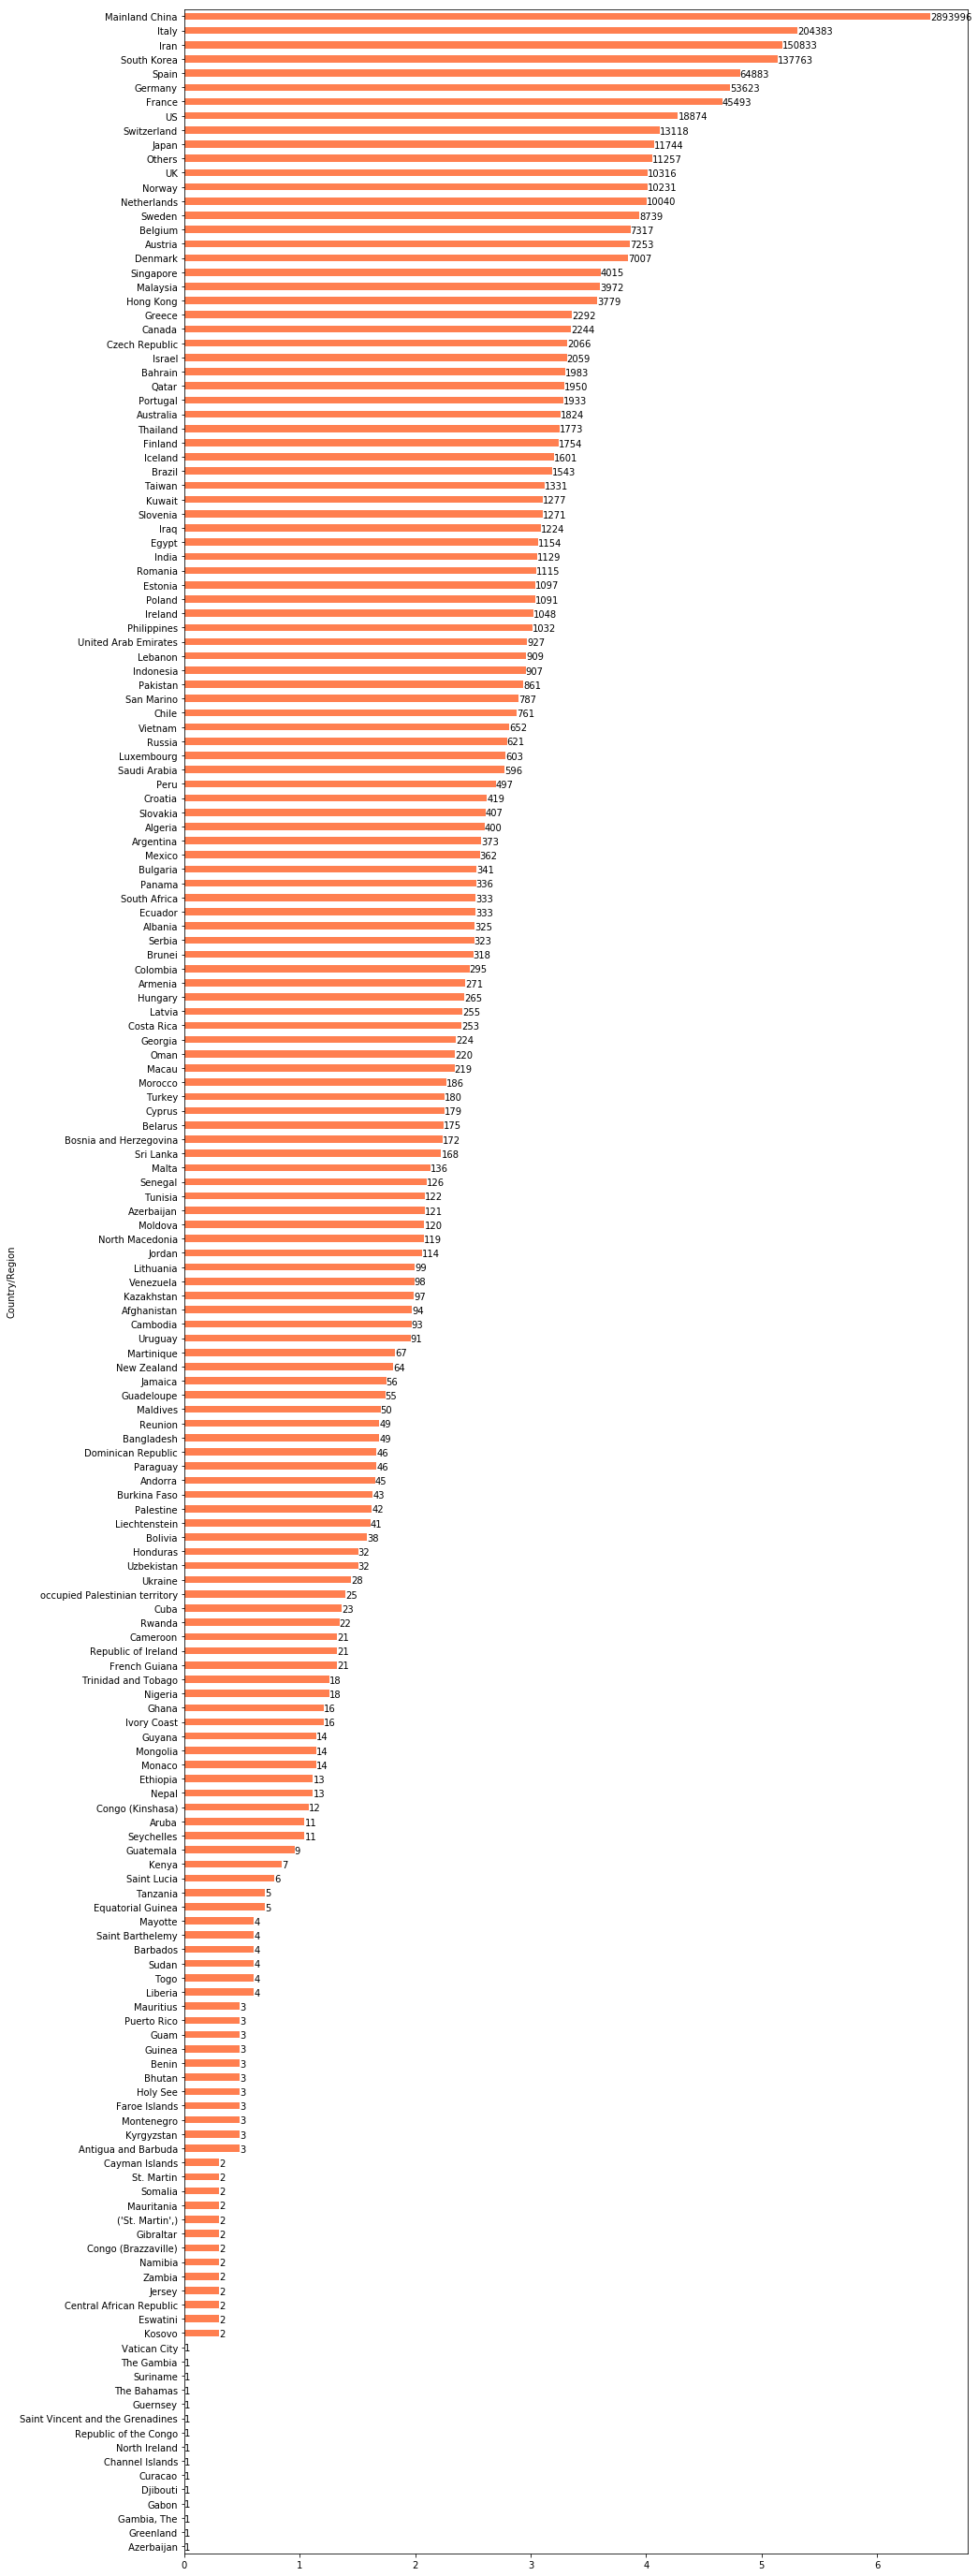

In [15]:
plt.figure(figsize=(15,50))
axx=np.log10(graphVal).plot(kind='barh',color="coral",)

# totals = []

# # find the values and append to list
# for i in axx.patches:
#     totals.append(i.get_width())

# # set individual bar lables using above list
# total = sum(totals)

for i,val in zip(axx.patches,graphVal.values):
    # get_width pulls left or right; get_y pushes up or down
    axx.text(i.get_width(), i.get_y(), \
            str(int(val)), fontsize=10)